In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
nodes = pd.read_csv("../data/Seattle_Loop_Dataset/nodes_loop_mp_list.csv")

In [57]:
nodes

,Unnamed: 0,milepost
0,0,d005es15036
1,1,d005es15125
2,2,d005es15214
3,3,d005es15280
4,4,d005es15315
...,...,...
318,318,i520es00746
319,319,i520es00770
320,320,i520es00861
321,321,i520es00935


In [3]:
len(nodes)

323

In [4]:
adj = np.load("../data/Seattle_Loop_Dataset/Loop_Seattle_2015_A.npy")

In [5]:
adj.shape

(323, 323)

In [6]:
g = nx.convert_matrix.from_numpy_array(adj)

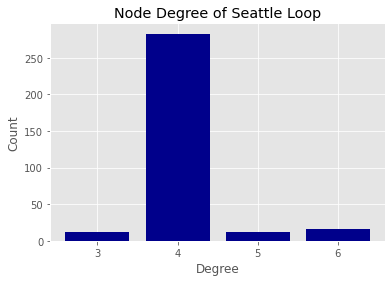

In [21]:
unique, counts = np.unique(list(dict(g.degree).values()), return_counts=True)
plt.bar(unique, counts, tick_label=unique, color='darkblue')
plt.title("Node Degree of Seattle Loop")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.savefig("Node_degree_dist_Seattle.png")

In [8]:
nx.diameter(g)

79

In [15]:
nx.cluster.average_clustering(g)

0.0

In [23]:
nx.is_connected(g)

True

In [24]:
nx.center(g)

[202, 203]

In [17]:
len(g.nodes)

323

In [27]:
centrality = nx.centrality.betweenness_centrality(g).values()

In [32]:
node_size=np.exp(list(centrality))

In [61]:
mp = nodes["milepost"]
mp = list(map(lambda entry: entry[1:4], mp))
col = list(map(lambda entry: 'purple' if entry=='090' else 'y' if entry=='405' else 'b' if entry=='520' else 'r', mp))

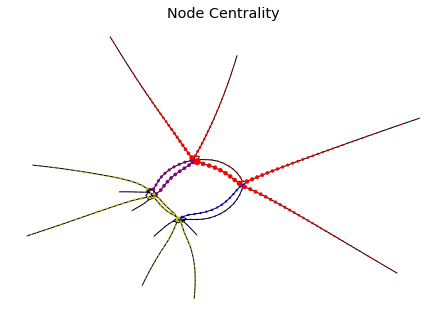

In [62]:
nx.draw_kamada_kawai(g, node_size=np.exp(np.array(list(centrality))*15), linewidths=0.01, node_color=col)
plt.title("Node Centrality")
plt.savefig("node_centrality.png")

In [19]:
len(g.edges)

662

In [82]:
r_g = nx.generators.gnp_random_graph(323, .01)

In [83]:
len(r_g.nodes)

323

In [84]:
len(r_g.edges)

514

In [86]:
nx.is_connected(r_g)

False

In [103]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(r_g), key=len)

# Create a subgraph of G consisting only of this component:
G2 = r_g.subgraph(largest_component)

In [105]:
nx.diameter(G2)

11

In [106]:
nx.average_clustering(G2)

0.007692912148357694

In [6]:
pd.HDFStore("../data/Seattle_Loop_Dataset/speed_matrix_2015")

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1400, in H5F__open
    unable to open file
  File "H5Fint.c", line 1700, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 411, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '../data/Seattle_Loop_Dataset/speed_matrix_2015'